In [1]:
import qiskit
from qiskit_aer.backends import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit_experiments.library import StateTomography


In [3]:
def time_evolve(t, dt, w, w0, w1):
    q = qiskit.QuantumRegister(1, name = 'q')
    c = qiskit.ClassicalRegister(1, name = 'c')
    circ = qiskit.QuantumCircuit(q,c)
    
    N = int(t/dt)

    for i in range(N):
         circ.rx(w1*dt*np.cos(w*i*dt)*2,0)
         circ.rz(-w0*dt,0)
    st1 = StateTomography(circ)
    sim = AerSimulator()
    N_shots = 10000
    
    #circ.measure(q,c)

    result =  st1.run(sim, shots=N_shots)
    #counts = result.get_counts(circ)
    return np.array(result.analysis_results('state').value)


    """ try:
          pass
     except KeyError:
          pass 
    if bit in counts:
     return counts[bit]/N_shots
    else:
       return 0 """

In [4]:
def beta(t,w,w0,w1):
    delta = w-w0
    omega = np.sqrt(w1**2 + delta**2)
    return w1*np.sin(omega*t/2)/omega

#-1j*w1*np.sin(omega*t/2)*np.exp(-1j*w*t)/omega

def alpha(t,w,w0,w1):
    delta = w-w0
    omega = np.sqrt(w1**2 + delta**2)
    return (-1j*delta*np.sin(omega*t/2)/omega + np.cos(omega*t/2))*np.exp(1j*w*t)

def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [5]:
t = np.arange(0.05,2,0.02)
w1 = 2
w0 =25
w = 25.5
dt = 0.02
A = []
B = []
delta = w-w0
omega = np.sqrt(w1**2 + delta**2)
for tt in t:
    rho = time_evolve(tt,dt,w,w0,w1)
    b = np.sqrt(np.abs(rho[1,1]))*sign(np.sin(omega*tt/2))
    B.append(b)
    A.append(rho[0,1]/(1j*b))

#other approach
"""for tt in t:
    rho = time_evolve(tt,dt,w,w0,w1)
    eigenvalues, eigenvectors =  np.linalg.eigh(rho)
    max_eigenvalue_index = np.argmax(eigenvalues)
    pure_state = eigenvectors[:, max_eigenvalue_index]
    #print(pure_state)
    A.append(pure_state[0])
    B.append(pure_state[1])"""


'for tt in t:\n    rho = time_evolve(tt,dt,w,w0,w1)\n    eigenvalues, eigenvectors =  np.linalg.eigh(rho)\n    max_eigenvalue_index = np.argmax(eigenvalues)\n    pure_state = eigenvectors[:, max_eigenvalue_index]\n    #print(pure_state)\n    A.append(pure_state[0])\n    B.append(pure_state[1])'

/Users/Giovanni/miniconda3/envs/Computational/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/Giovanni/miniconda3/envs/Computational/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


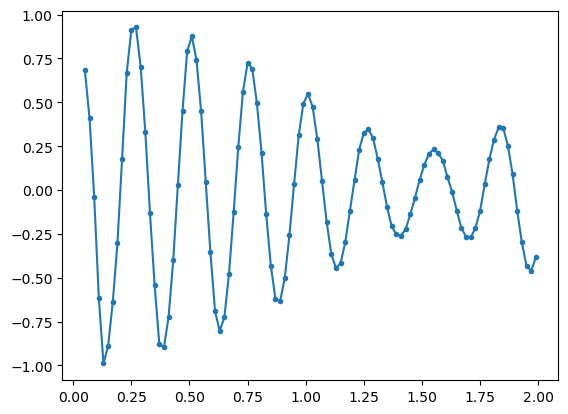

In [6]:
plt.plot(t,A,'.-')

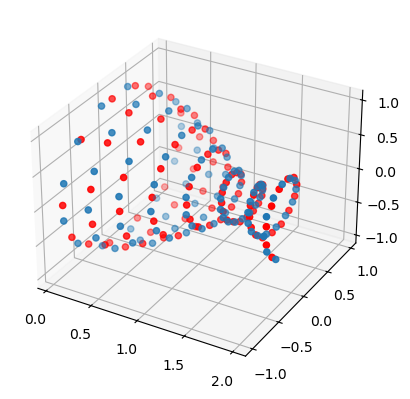

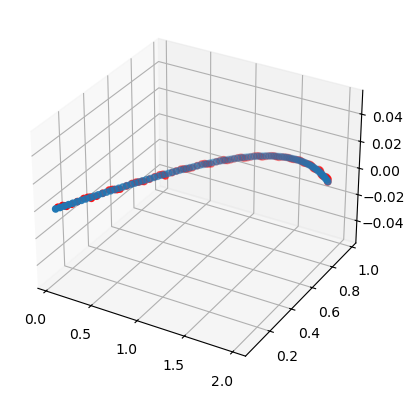

In [7]:
Areal = np.real(A)
Aim = np.imag(A)
alphareal = np.real(alpha(t,w,w0,w1))
alphaim = np.imag(alpha(t,w,w0,w1))
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(t,Areal,Aim, color = "red")
ax.scatter(t,alphareal,alphaim)

#simulation
Breal = np.real(B) 
Bim = np.imag(B)
#theory
betareal = np.real(beta(t,w,w0,w1))
betaim = np.imag(beta(t,w,w0,w1))
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(t,Breal,Bim, color = "red")
ax.scatter(t,betareal,betaim)

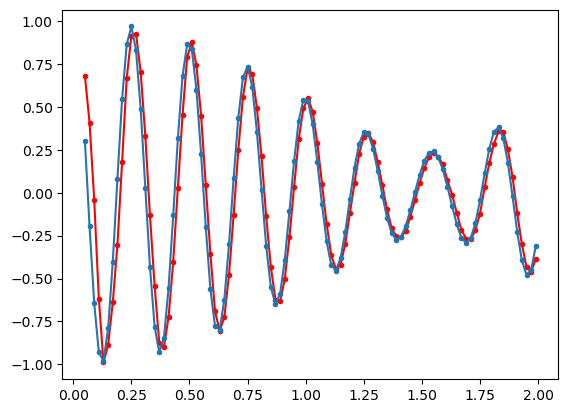

In [8]:

plt.plot(t,Areal, '.-', color = "red")
plt.plot(t,alphareal, '.-')


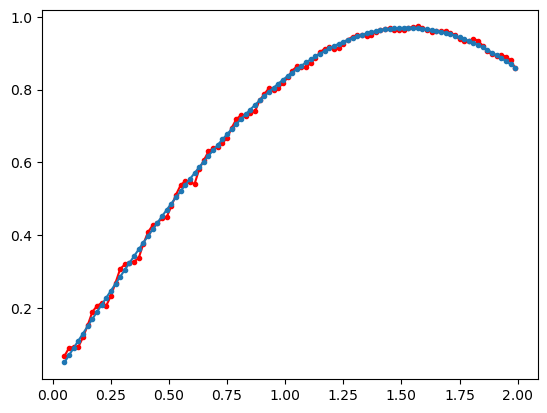

In [9]:
plt.plot(t,Breal, '.-', color = "red")
plt.plot(t,betareal, '.-')